# Graceful Labellings of the Path Graph $P_n$


In [2]:
from itertools import pairwise, permutations
from typing import Generator
import ipytest
import pytest

Brute force approach considers $n!$ labellings.


In [3]:
def find_graceful_directed_paths(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices - 1
    for path in permutations(range(n_edges + 1), n_vertices):
        labelling = {(y - x) % (n_edges + 1) for x, y in pairwise(path)}
        if labelling == set(range(1, n_edges + 1)):
            yield path

In [4]:
find_graceful_directed_paths_1 = find_graceful_directed_paths

Perform early exit if labelling contains repeated difference, e.g. `(0, 1, 2,...)` can be rejected without considering further labels.


In [6]:
def find_graceful_directed_paths(
    n_vertices: int,
    path_labels: list[int] = [],
) -> Generator[tuple[int, ...], None, None]:
    if len(path_labels) == n_vertices:
        yield tuple(path_labels)
    n_edges = n_vertices - 1
    arc_labels = {(y - x) % (n_edges + 1) for x, y in pairwise(path_labels)}
    other_labels = [label for label in range(n_vertices) if label not in path_labels]
    for label in other_labels:
        if (
            not arc_labels
            or (label - path_labels[-1]) % (n_edges + 1) not in arc_labels
        ):
            yield from find_graceful_directed_paths(n_vertices, path_labels + [label])


In [7]:
find_graceful_directed_paths_2 = find_graceful_directed_paths

Finally realise that a graceful labelling of $P_n^*$ remains graceful under reverse ordering. Find a half of all graceful labellings that are distinct under reversal, then reverse them.


In [8]:
def find_graceful_directed_paths(
    n_vertices: int,
) -> Generator[tuple[int, ...], None, None]:
    n_edges = n_vertices - 1

    def recurse(path_labels: list[int] = []) -> Generator[tuple[int, ...], None, None]:
        if len(path_labels) == n_vertices:
            yield tuple(path_labels)
            yield tuple(reversed(path_labels))
        arc_labels = {(y - x) % (n_edges + 1) for x, y in pairwise(path_labels)}
        other_labels = [
            label for label in range(n_vertices) if label not in path_labels
        ]
        for label in other_labels:
            if (label - path_labels[-1]) % (n_edges + 1) not in arc_labels:
                yield from recurse(path_labels + [label])

    for start in range((n_vertices + 1) // 2):
        yield from recurse([start])


In [9]:
find_graceful_directed_paths_3 = find_graceful_directed_paths

In [ ]:
# %load_ext ipytest

ipytest.autoconfig()


@pytest.mark.parametrize("path_size", range(1, 11))
def test_graceful_path_methods(path_size: int) -> None:
    assert set(find_graceful_directed_paths_1(path_size)) == set(
        find_graceful_directed_paths_3(path_size)
    )


ipytest.run()

..........                                                                                   [100%]
10 passed in 8.89s


<ExitCode.OK: 0>

In [21]:
%%timeit
for _ in find_graceful_directed_paths_1(10):
    ...

7.49 s ± 353 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
for _ in find_graceful_directed_paths_2(10):
    ...

692 ms ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
for _ in find_graceful_directed_paths_3(10):
    ...

328 ms ± 48.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


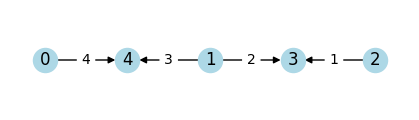

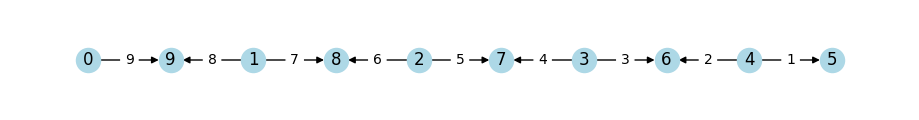

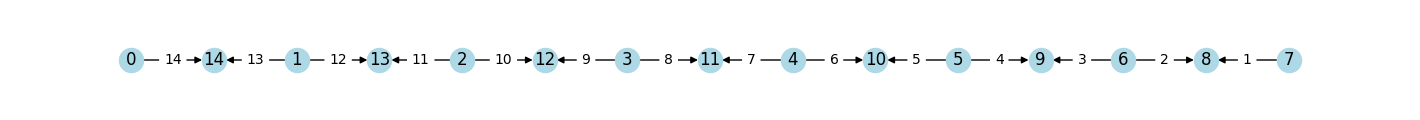

In [1]:
from graphs import PathGraph
from graceful_labellings.alpha_valuations import path_1

PathGraph.from_vertices_standard(path_1(5)).draw()
PathGraph.from_vertices_standard(path_1(10)).draw()
PathGraph.from_vertices_standard(path_1(15)).draw()